# Отбор признаков путём удаления высококоррелированных признаков

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv('diabetes.csv', skiprows=1, names=col_names)

In [3]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
X = df.drop('label', axis=1)
y = df['label']

In [7]:
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


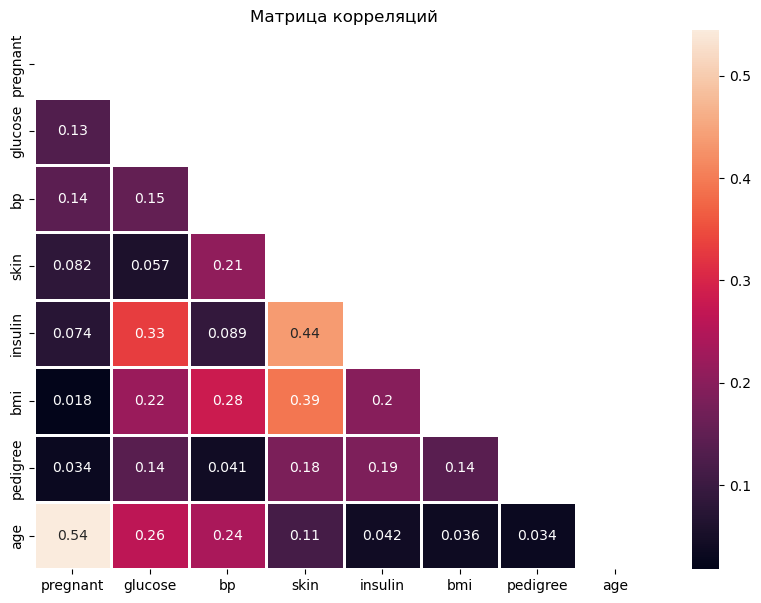

In [8]:
corr = X.corr().abs()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))
plt.title('Матрица корреляций')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=2);

In [9]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
upper

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
pregnant,NaN,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
glucose,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
bp,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528
skin,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,0.113970
insulin,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,0.042163
bmi,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242
pedigree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
to_drop = [column for column in upper.columns if any(upper[column]>0.4)]
to_drop

['insulin', 'age']

In [11]:
X.drop(columns=to_drop, inplace=True)

In [12]:
X.head()

,pregnant,glucose,bp,skin,bmi,pedigree
0,6,148,72,35,33.6,0.627
1,1,85,66,29,26.6,0.351
2,8,183,64,0,23.3,0.672
3,1,89,66,23,28.1,0.167
4,0,137,40,35,43.1,2.288


Со всеми

accuracy - 0.7727272727272727


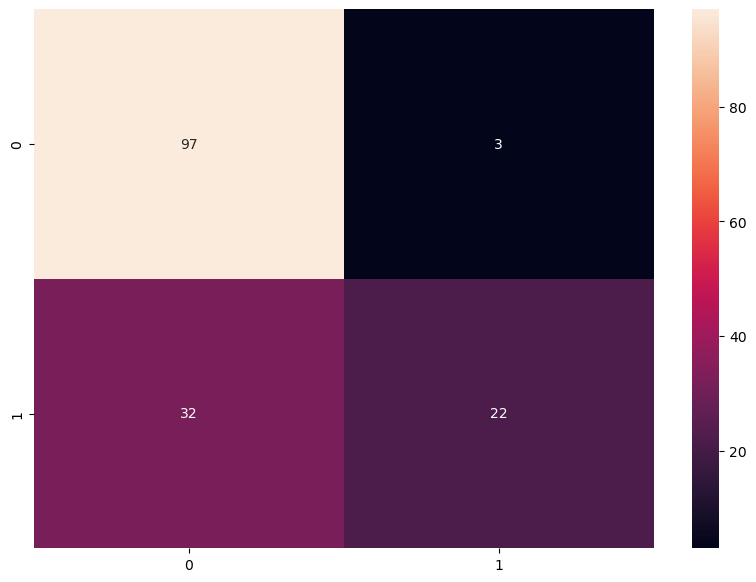

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

X_ = df.drop('label', axis=1)
y_ = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=5)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred)}")

не со всеми

accuracy - 0.7922077922077922


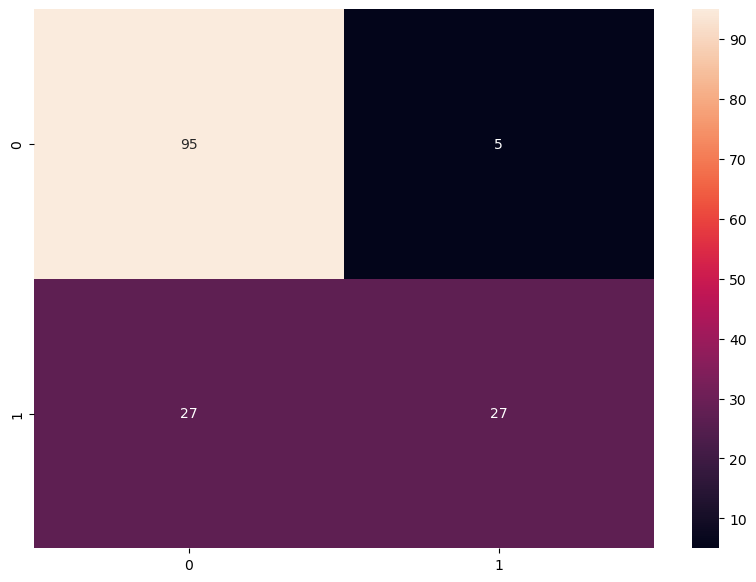

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred)}")

# HEART

In [15]:
df1 = pd.read_csv('heart.csv')
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X = df1.drop('output', axis=1)
y = df1['output']

разделение на тест и трейн

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Матрица корреляций

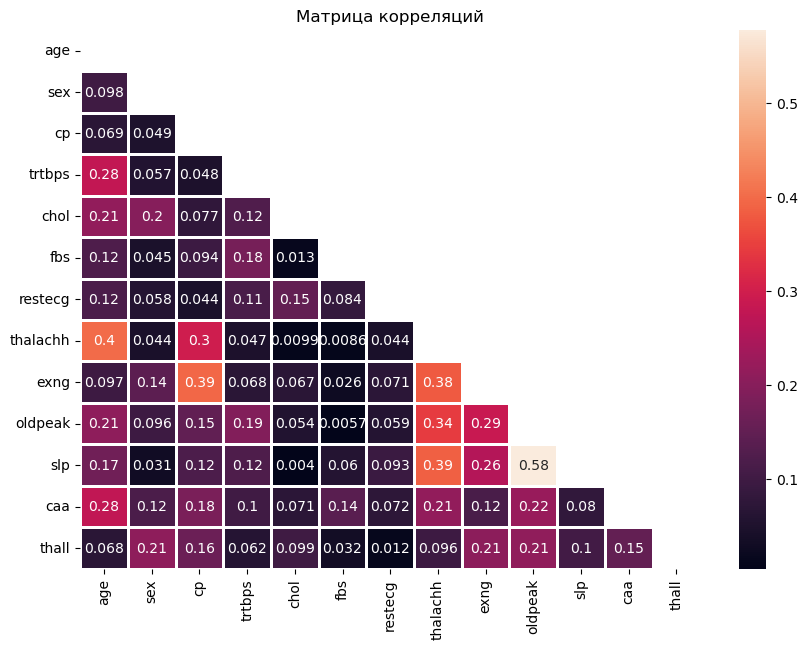

In [18]:
corr = X.corr().abs()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (10,7))
plt.title('Матрица корреляций')
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidths=2);

отбираем признаки

In [19]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column]>0.35)] # поменяли на 0.35
X.drop(columns=to_drop, inplace=True)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,oldpeak,caa,thall
0,63,1,3,145,233,1,0,2.3,0,1
1,37,1,2,130,250,0,1,3.5,0,2
2,41,0,1,130,204,0,0,1.4,0,2
3,56,1,1,120,236,0,1,0.8,0,2
4,57,0,0,120,354,0,1,0.6,0,2


Со всеми

accuracy - 0.8852459016393442


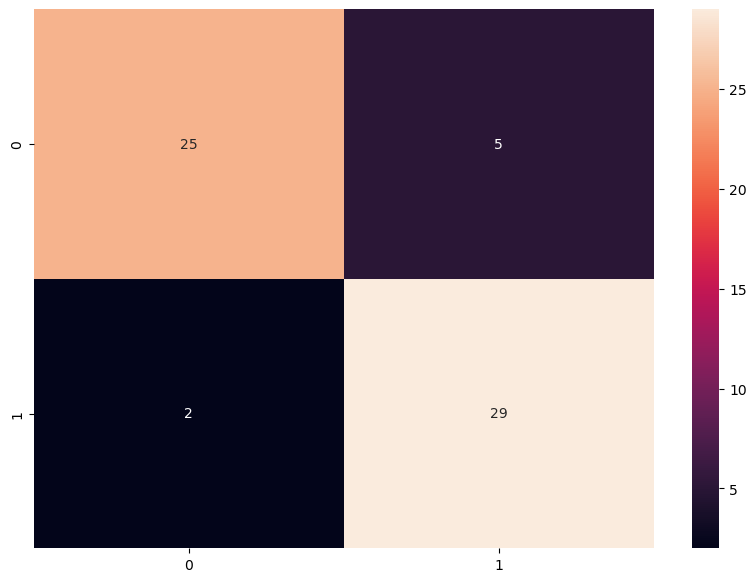

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

X_ = df1.drop('output', axis=1)
y_ = df1['output']

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=5)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred)}")

не со всеми

accuracy - 0.9016393442622951


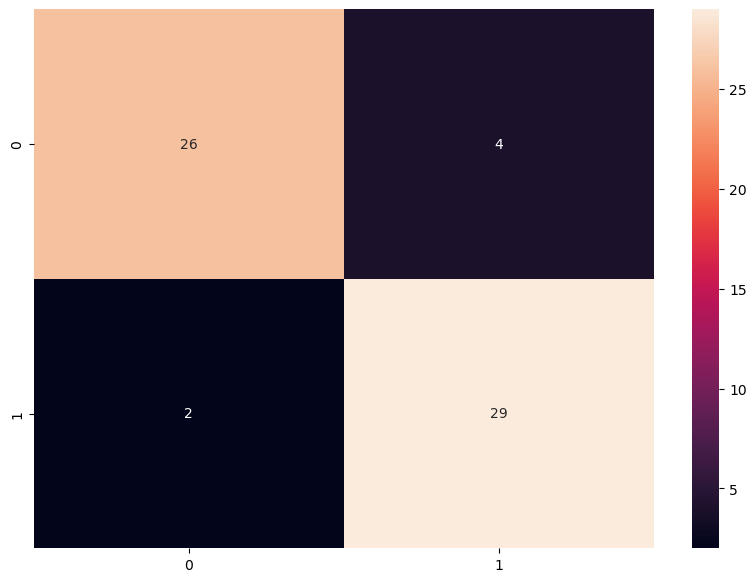

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred)}")

## PCA

In [22]:
X = df1.drop('output', axis=1)
y = df1['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

шкалирование

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

понижение размерности

In [24]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
X_train_st_с2 = pca_2.fit_transform(X_train_st)
X_test_st_с2 = pca_2.transform(X_test_st)

обучение модели до PCA

accuracy - 0.8852459016393442


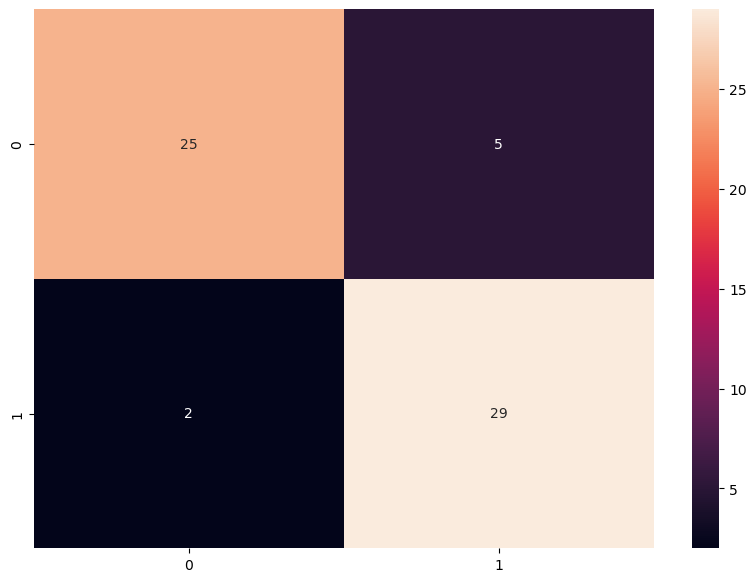

In [25]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st, y_train)

y_pred = classifier.predict(X_test_st)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred)}")

обучение модели после PCA

accuracy - 0.8688524590163934


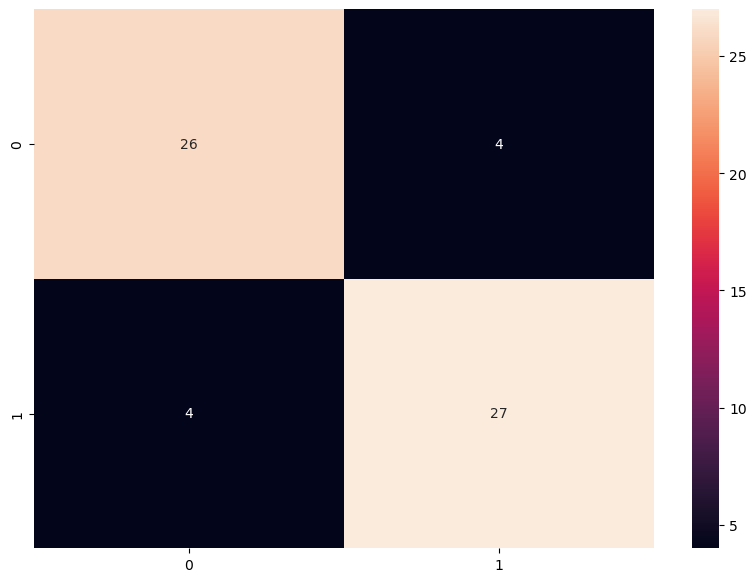

In [26]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_st_с2, y_train)

y_pred_с2 = classifier.predict(X_test_st_с2)

cm = confusion_matrix(y_test, y_pred_с2)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True);

print(f"accuracy - {accuracy_score(y_test, y_pred_с2)}")